# Full bridge rectifier
Consider the mentioned topology interfacing the sinusoidal grid voltage with a constant dc current load and an energy storage capacitor to sustain the load current

In [1]:
from matplotlib import pyplot as plt
from numpy import linspace, sin, cos, pi, sqrt, clip
import pandas as pd
import numpy as np

In [21]:
fg = 60  # [Hz] grid frequency
Ug = 220  # [V] rms grid voltage
C = 1.723e-3  #[F] rectifier capacitance
# R = 100  # [ohm] load equivalent linear resistance
Io = 3.22  # [A] constant load current
Ud = .7  # [V] diode forward bias voltage drop

In [22]:
t = linspace(0, 1, 100000)
ug = Ug * sqrt(2) * sin(2*pi*fg*t)  # grid voltage

In [23]:
# Full bridge rectifier:
ur = clip(abs(ug)-2*Ud,0,1e6)
# ur = abs(ug)

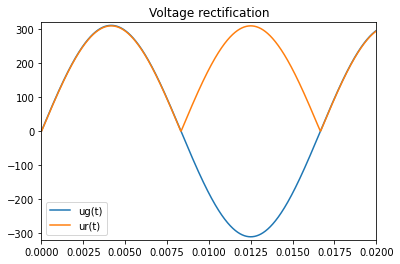

In [24]:
plt.plot(t,ug,t,ur); plt.title('Voltage rectification'); 
plt.axis([0,.02,-320,320]); plt.legend(['ug(t)', 'ur(t)']);

In [25]:
uc = 0*t  # initialization
ig = 0*t  # initialization
dt = t[1]-t[0]

for ti in range(1,len(t)):
    if ur[ti] < uc[ti-1]:  #FIXME: diode voltage drop Ud not considered here
        duc = -dt*Io/C
        uc[ti] = clip(uc[ti-1] + duc,0,1e6)
    else:
        uc[ti] = ur[ti]
        duc = uc[ti] - uc[ti-1]
        if ti > 2 and True:
            duc_backward = uc[ti-1] - uc[ti-2]
            duc_forward = uc[ti] - uc[ti-1]
            duc = (duc_backward + duc_forward)/2
    if ug[ti] < 0:
        sign = -1
    else:
        sign = 1
    ig[ti] = (C*duc/dt + Io)*sign

p_in = ur * ig
p_out = uc * Io

Text(0.5, 1.0, 'Output voltage ripple')

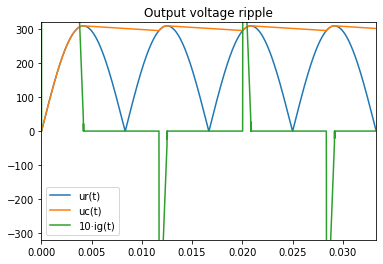

In [27]:
plt.plot(t,ur,t,uc,t,ig*10); plt.axis([0,2*.016667,-320,320]); 
plt.legend(['ur(t)', 'uc(t)', '10·ig(t)']); plt.title('Output voltage ripple')

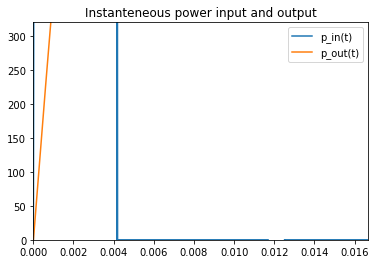

In [28]:
plt.plot(t,p_in, t, p_out); plt.axis([0,.016667,0,320]); 
plt.legend(['p_in(t)', 'p_out(t)']); plt.title('Instanteneous power input and output');

In [29]:
df = pd.DataFrame(
    {
        't': t,
        'ug': ug,
        'ig': ig,
        'uc': uc
    }
)

In [30]:
df.head()
df.to_csv('full bridge rectifier waveforms.csv')

In [31]:
np.mean(p_out)

974.0700274000503

In [32]:
sqrt(1000/96.72)

3.215450705942955